In [1]:
from functions import constructQP,EqualityQPSolver,constructQP,construct_matrix,sensitivity
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter 

c:\Users\maria\OneDrive - Danmarks Tekniske Universitet\Kandidat\1_semester\Constrained optimization\ConOpti\Algorithms\QP\functions.py:74: SparseEfficiencyWarning: splu converted its input to CSC format
  LU_decomp = splu(KKT_mat)


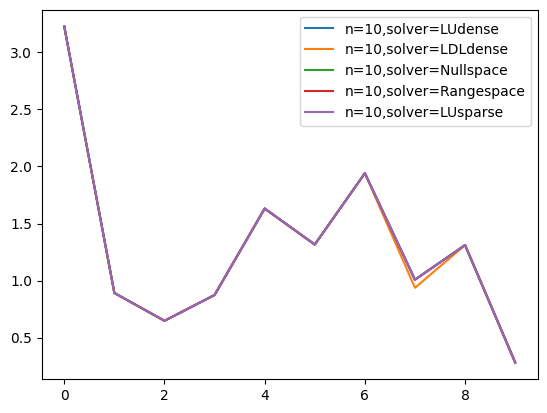

In [45]:

n       = np.arange(start=10,stop=11, dtype=int)
alpha   = 2
solvers = ["LUdense","LDLdense","Nullspace","Rangespace","LUsparse"]

plt.figure()

for i in n:

    # Current problem given current n
    H, g, A, b, x_star,lamb_star,lenrhs = constructQP(i,alpha) 

    # Computing solution from all solvers
    for solver in solvers:

        x,lam = EqualityQPSolver(H,g,A,b,solver)
        
        err_temp = np.abs(x-x_star)

        plt.plot(err_temp,label=f"n={i},solver={solver}")

plt.legend()
plt.show()

# Hvad sker der for at KKT matricen bliver singular??

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


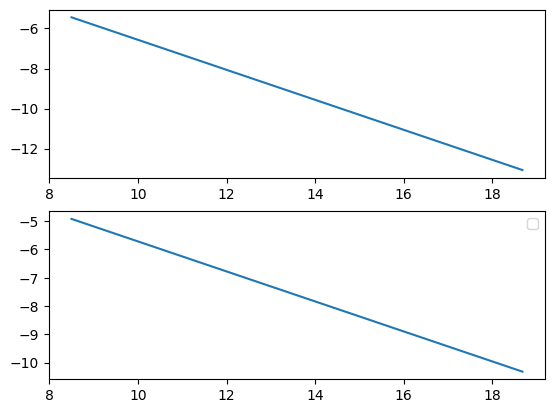

In [39]:
H = np.array([
    [5.0000, 1.8600, 1.2400, 1.4800, -0.4600],
    [1.8600, 3.0000, 0.4400, 1.1200, 0.5200],
    [1.2400, 0.4400, 3.8000, 1.5600, -0.5400],
    [1.4800, 1.1200, 1.5600, 7.2000, -1.1200],
    [-0.4600, 0.5200, -0.5400, -1.1200, 7.8000]
])
A = np.array([
    [16.1000, 1.0000],
    [8.5000, 1.0000],
    [15.7000, 1.0000],
    [10.0200, 1.0000],
    [18.6800, 1.0000]
])
g = np.array([
    -16.1000,
    -8.5000,
    -15.7000,
    -10.0200,
    -18.6800])

def b_vec(val):
    b = np.array([15,val])
    return b

b_values = np.linspace(8.5,18.68,100)

fig, (ax1, ax2) = plt.subplots(2, 1) 

n,m = A.shape

x_sol = np.zeros([len(b_values),n])
lam_sol = np.zeros([len(b_values),m])

for i,val in enumerate(b_values):
    
    x,lam = EqualityQPSolver(H,g,A,b_vec(val),"LUdense")
    x_sol[i,:] = x
    lam_sol[i,:] = lam

ax1.plot(b_values,x_sol[:,0])   #,label = f"x values for b={val}")
ax2.plot(b_values,lam_sol[:,0]) #,label=f"lambda values for b={val}")
    
plt.legend()
plt.show()

# Hvad skal x aksen være ?? 


In [40]:
resg,resb = sensitivity(H,A)
print(A.shape)
print(x.shape)
print(lam.shape)
print("dg=",resg) 
print("db=",resb) 

(5, 2)
(5,)
(2,)
dg= [[-0.18104425  0.01151626  0.12304267 -0.00194094  0.04842626]
 [ 0.01151626 -0.09113189 -0.02044739  0.11073256 -0.01066954]
 [ 0.12304267 -0.02044739 -0.22549564  0.06497475  0.05792561]
 [-0.00194094  0.11073256  0.06497475 -0.15194856 -0.0218178 ]
 [ 0.04842626 -0.01066954  0.05792561 -0.0218178  -0.07386453]
 [ 0.06166713 -0.10868245  0.02577517 -0.01495657  0.03619671]
 [-0.74921753  1.78130085 -0.04789681  0.30277957 -0.28696607]]
db= [[ 0.06166713 -0.74921753]
 [-0.10868245  1.78130085]
 [ 0.02577517 -0.04789681]
 [-0.01495657  0.30277957]
 [ 0.03619671 -0.28696607]
 [ 0.03911786 -0.53043633]
 [-0.53043633  8.62788288]]
